In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os
import random
sns.set_style("whitegrid")
!pip install matrixprofile
import matrixprofile as mp
import matplotlib.gridspec as gridspec
!pip install sklearn
from sklearn import preprocessing
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


You should consider upgrading via the 'c:\users\justi\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\justi\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


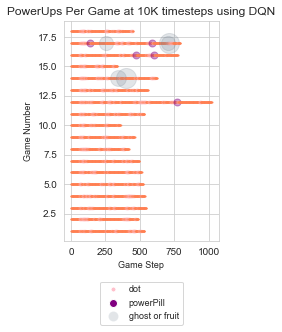

In [22]:
# plot rewards obtained in game (eating ghost/fruit/pill/powerpill) as per 
# https://github.com/byrdsmyth/gym/blob/master/envDocs/environments_descriptions
# using DQN

#Variable for figure size (w,h)
fgsz = (3, 5)

# read from csv
col_list = ["steps_game", "total_game", "step_reward"]
df = pd.read_csv("dqn_pacman_100k/df_mod.csv", usecols=col_list, nrows=10000)

plt.figure(figsize=fgsz)

for index, row in df.iterrows():
    # print("rew at ", index, " ", df["step_reward"][index])
    reward = df["step_reward"][index]
    # check if dot was eaten with another powerup
    isDot = False
    if(reward == 60 or (reward > 60 and abs(reward) % 100 == 10)):
        isDot = True
    # no reward
    if(reward < 10 ):
        plt.scatter(row['steps_game'],row['total_game'],c="coral",s=1,alpha=0.5, label ="")
    # ate dot 
    if(reward == 10 or isDot):
        plt.scatter(row['steps_game'],row['total_game'],c="pink",s=reward,alpha=0.2, label ="")
    # ate pill
    if(reward == 50):
        plt.scatter(row['steps_game'],row['total_game'],c='purple',s=reward,alpha=0.4, label ="")
    # ate ghost or fruit
    if(reward > 60):
        plt.scatter(row['steps_game'],row['total_game'],c='slategrey',s=reward,alpha=0.2, label ="")


plt.ylabel('Game Number', fontsize=9)
plt.xlabel('Game Step', fontsize=9)
plt.title('PowerUps Per Game at 10K timesteps using DQN')

dot_marker = Line2D([0], [0], marker='o', color='w', label='dot',
                        markerfacecolor='pink', markersize=5)
pill_marker = Line2D([0], [0], marker='o', color='w', label='powerPill',
                        markerfacecolor='purple', markersize=8)
ghost_fruit_marker = Line2D([0], [0], marker='o', color='w', label='ghost or fruit',
                        markerfacecolor='slategrey', markersize=10, alpha=0.2)
plt.legend( loc='lower center', bbox_to_anchor=(0.5, -0.4), fontsize=9, handles=[dot_marker, pill_marker, ghost_fruit_marker])

plt.tight_layout()

plt.show()

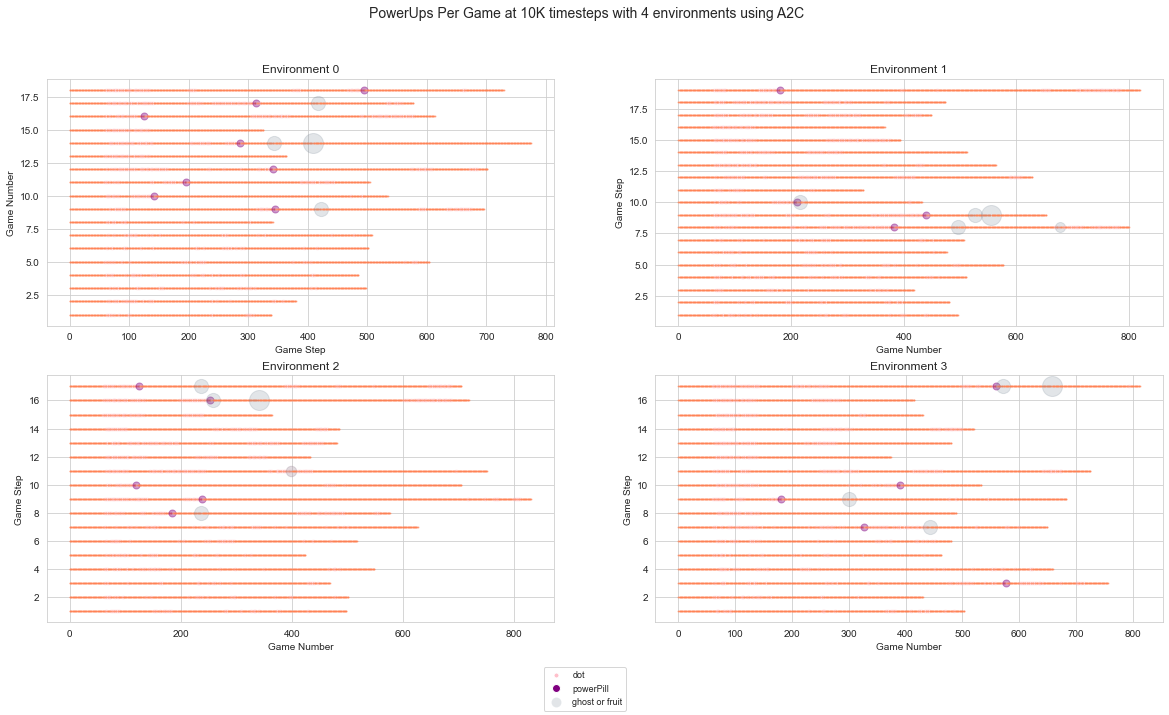

In [59]:
# plot rewards obtained in game (eating ghost/fruit/pill/powerpill) as per 
# https://github.com/byrdsmyth/gym/blob/master/envDocs/environments_descriptions
# using A2C

f, [[ax0,ax1],[ax2,ax3]] = plt.subplots(2,2, figsize=(20,10))
f.suptitle('PowerUps Per Game at 10K timesteps with 4 environments using A2C', fontsize=14)

# csv_file = "a2c_data_2021-02-10_14-03-28/df_mod.csv"
csv_file = "vis_3.csv"

num_rows = 10000

# TODO: fix the axis ticks to be whole numbers :(
# read from csv
col_list_0 = ["steps_game_env_0", "total_game_env_0", "step_reward_env_0"]
col_list_1 = ["steps_game_env_1", "total_game_env_1", "step_reward_env_1"]
col_list_2 = ["steps_game_env_2", "total_game_env_2", "step_reward_env_2"]
col_list_3 = ["steps_game_env_3", "total_game_env_3", "step_reward_env_3"]

df = pd.read_csv(csv_file, usecols=col_list_0, nrows = num_rows)
# remove the last game 
df = df[df["total_game_env_0"] != max(df["total_game_env_0"])]

for index, row in df.iterrows():
    # print("rew at ", index, " ", df["step_reward"][index])
    reward = df["step_reward_env_0"][index]
    # check if dot was eaten with another powerup
    isDot = False
    if(reward == 60 or (reward > 60 and abs(reward) % 100 == 10)):
        isDot = True
    # no reward
    if(reward < 10 ):
        ax0.scatter(row['steps_game_env_0'],row['total_game_env_0'],c="coral",s=1,alpha=0.5, label ="")
    # ate dot 
    if(reward == 10 or isDot):
        ax0.scatter(row['steps_game_env_0'],row['total_game_env_0'],c="pink",s=reward,alpha=0.2, label ="")
    # ate pill
    if(reward == 50):
        ax0.scatter(row['steps_game_env_0'],row['total_game_env_0'],c='purple',s=reward,alpha=0.4, label ="")
    # ate ghost or fruit
    if(reward > 60):
        ax0.scatter(row['steps_game_env_0'],row['total_game_env_0'],c='slategrey',s=reward,alpha=0.2, label ="")
        
ax0.set_ylabel('Game Number')
ax0.set_xlabel('Game Step')
ax0.set_title('Environment 0')

# read from csv
df1 = pd.read_csv(csv_file, usecols=col_list_1, nrows = num_rows)
# remove the last game 
df1 = df1[df1["total_game_env_1"] != max(df1["total_game_env_1"])]

for index, row in df1.iterrows():
    reward = df1["step_reward_env_1"][index]
    
    # check if dot was eaten with another powerup
    isDot = False
    if(reward == 60 or (reward > 60 and abs(reward) % 100 == 10)):
        isDot = True
    # no reward
    if(reward < 10 ):
        ax1.scatter(row['steps_game_env_1'],row['total_game_env_1'],c="coral",s=1,alpha=0.5, label ="")
    # ate dot 
    if(reward == 10 or isDot):
        ax1.scatter(row['steps_game_env_1'],row['total_game_env_1'],c="pink",s=reward,alpha=0.2, label ="")
    # ate pill
    if(reward == 50):
        ax1.scatter(row['steps_game_env_1'],row['total_game_env_1'],c='purple',s=reward,alpha=0.4, label ="")
    # ate ghost or fruit
    if(reward > 60):
        ax1.scatter(row['steps_game_env_1'],row['total_game_env_1'],c='slategrey',s=reward,alpha=0.2, label ="")
        
ax1.set_xlabel('Game Number')
ax1.set_ylabel('Game Step')
ax1.set_title('Environment 1')

df2 = pd.read_csv(csv_file, usecols=col_list_2, nrows = num_rows)
# remove the last game 
df2 = df2[df2["total_game_env_2"] != max(df2["total_game_env_2"])]

for index, row in df2.iterrows():
    # print("rew at ", index, " ", df["step_reward"][index])
    reward = df2["step_reward_env_2"][index]
    # check if dot was eaten with another powerup
    isDot = False
    if(reward == 60 or (reward > 60 and abs(reward) % 100 == 10)):
        isDot = True
    # no reward
    if(reward < 10 ):
        ax2.scatter(row['steps_game_env_2'],row['total_game_env_2'],c="coral",s=1,alpha=0.5, label ="")
    # ate dot 
    if(reward == 10 or isDot):
        ax2.scatter(row['steps_game_env_2'],row['total_game_env_2'],c="pink",s=reward,alpha=0.2, label ="")
    # ate pill
    if(reward == 50):
        ax2.scatter(row['steps_game_env_2'],row['total_game_env_2'],c='purple',s=reward,alpha=0.4, label ="")
    # ate ghost or fruit
    if(reward > 60):
        ax2.scatter(row['steps_game_env_2'],row['total_game_env_2'],c='slategrey',s=reward,alpha=0.2, label ="")
        
ax2.set_xlabel('Game Number')
ax2.set_ylabel('Game Step')
ax2.set_title('Environment 2')

df3 = pd.read_csv(csv_file, usecols=col_list_3, nrows = num_rows)
# remove the last game 
df3 = df3[df3["total_game_env_3"] != max(df3["total_game_env_3"])]

for index, row in df3.iterrows():
    # print("rew at ", index, " ", df["step_reward"][index])
    reward = df3["step_reward_env_3"][index]
    # check if dot was eaten with another powerup
    isDot = False
    if(reward == 60 or (reward > 60 and abs(reward) % 100 == 10)):
        isDot = True
    # no reward
    if(reward < 10 ):
        ax3.scatter(row['steps_game_env_3'],row['total_game_env_3'],c="coral",s=1,alpha=0.5, label ="")
    # ate dot 
    if(reward == 10 or isDot):
        ax3.scatter(row['steps_game_env_3'],row['total_game_env_3'],c="pink",s=reward,alpha=0.2, label ="")
    # ate pill
    if(reward == 50):
        ax3.scatter(row['steps_game_env_3'],row['total_game_env_3'],c='purple',s=reward,alpha=0.4, label ="")
    # ate ghost or fruit
    if(reward > 60):
        ax3.scatter(row['steps_game_env_3'],row['total_game_env_3'],c='slategrey',s=reward,alpha=0.2, label ="")
ax3.set_xlabel('Game Number')
ax3.set_ylabel('Game Step')
ax3.set_title('Environment 3')

dot_marker = Line2D([0], [0], marker='o', color='w', label='dot',
                        markerfacecolor='pink', markersize=5)
pill_marker = Line2D([0], [0], marker='o', color='w', label='powerPill',
                        markerfacecolor='purple', markersize=8)
ghost_fruit_marker = Line2D([0], [0], marker='o', color='w', label='ghost or fruit',
                        markerfacecolor='slategrey', markersize=10, alpha=0.2)
f.legend( loc='lower center', fontsize=9, handles=[dot_marker, pill_marker, ghost_fruit_marker])

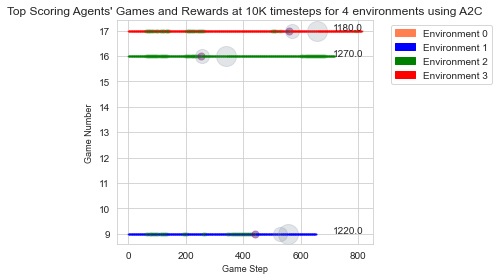

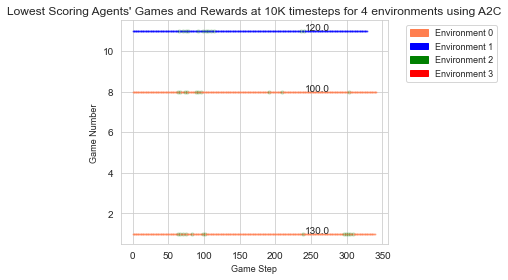

In [47]:
# plot best and worst performing games based on rewards in A2C

import math
csv_file = "vis_3.csv"
df_og = df_0 = pd.read_csv(csv_file)

col_list_0 = ["is_end_of_game_env_0","total_game_env_0", "game_reward_env_0"]
df_0 = pd.read_csv(csv_file, usecols = col_list_0)
col_list_1 = ["is_end_of_game_env_1","total_game_env_1", "game_reward_env_1"]
df_1 = pd.read_csv(csv_file, usecols = col_list_1)
col_list_2 = ["is_end_of_game_env_2","total_game_env_2", "game_reward_env_2"]
df_2 = pd.read_csv(csv_file, usecols = col_list_2)
col_list_3 = ["is_end_of_game_env_3","total_game_env_3", "game_reward_env_3"]
df_3 = pd.read_csv(csv_file, usecols = col_list_3)

games = {}
# trim the last game
df_res_0 = df_0.groupby(["total_game_env_0"]).max().apply(lambda x: x.iloc[:-1])
df_res_1 = df_1.groupby(["total_game_env_1"]).max().apply(lambda x: x.iloc[:-1])
df_res_2 = df_2.groupby(["total_game_env_2"]).max().apply(lambda x: x.iloc[:-1])
df_res_3 = df_3.groupby(["total_game_env_3"]).max().apply(lambda x: x.iloc[:-1])

for index, row in df_res_0.iterrows():
    if math.isnan(row["game_reward_env_0"]) == False:
        games[str(0)+","+str(index)] = {"env":0, "game":index, "reward": row["game_reward_env_0"]}
for index, row in df_res_1.iterrows():
    if math.isnan(row["game_reward_env_1"]) == False:
        games[str(1)+","+str(index)] = {"env":1, "game":index, "reward": row["game_reward_env_1"]}
for index, row in df_res_2.iterrows():
    if math.isnan(row["game_reward_env_2"]) == False:
        games[str(2)+","+str(index)] = {"env":2, "game":index, "reward": row["game_reward_env_2"]}
for index, row in df_res_3.iterrows():
    if math.isnan(row["game_reward_env_3"]) == False:
        games[str(3)+","+str(index)] = {"env":3, "game":index, "reward": row["game_reward_env_3"]}
        
fgsz = (3, 5)
colours = ["coral", "blue", "green", "red"]

sorted_games = sorted(games, key=lambda x: int(games[x]['reward']), reverse = True)
max_num_steps = 0

for i in range (3):
    env_num, game_num = sorted_games[i].split(",")
    col_list = ["steps_game_env_" + env_num, "total_game_env_" + env_num]
    df = df_og[df_og["total_game_env_" + env_num] == int(game_num)]
    val = df["steps_game_env_"+ env_num].to_numpy()[-2]
    max_num_steps = max(max_num_steps, val)

for i in range (3):
    env_num, game_num = sorted_games[i].split(",")

    col_list = ["steps_game_env_" + env_num, "total_game_env_" + env_num, "step_reward_env_" + env_num]
    df = pd.read_csv(csv_file,usecols=col_list)
    df = df[df["total_game_env_" + env_num] == int(game_num)]
    
    for index, row in df.iterrows():
        reward = df["step_reward_env_"+env_num][index]
        # check if dot was eaten with another powerup
        isDot = False
        if(reward == 60 or (reward > 60 and abs(reward) % 100 == 10)):
            isDot = True
        # no reward
        if(reward < 10 ):
            plt.scatter(row['steps_game_env_'+env_num],row['total_game_env_'+env_num],c=colours[int(env_num)],s=1,alpha=0.5, label ="")
        # ate dot 
        if(reward == 10 or isDot):
            plt.scatter(row['steps_game_env_'+env_num],row['total_game_env_'+env_num],c="green",s=reward,alpha=0.2, label ="")
        # ate pill
        if(reward == 50):
            plt.scatter(row['steps_game_env_'+env_num],row['total_game_env_'+env_num],c='purple',s=reward,alpha=0.4, label ="")
        # ate ghost or fruit
        if(reward > 60):
            plt.scatter(row['steps_game_env_'+env_num],row['total_game_env_'+env_num],c='slategrey',s=reward,alpha=0.2, label ="")
    # TODO: get variable for max number of steps
        
    plt.text(max(100, max_num_steps-100),int(game_num),games[sorted_games[i]]["reward"])

coral_patch = mpatches.Patch(color='coral', label='Environment 0')
blue_patch = mpatches.Patch(color='blue', label='Environment 1')
green_patch = mpatches.Patch(color='green', label='Environment 2')
red_patch = mpatches.Patch(color='red', label='Environment 3')

plt.ylabel('Game Number', fontsize=9)
plt.xlabel('Game Step', fontsize=9)
plt.title('Top Scoring Agents\' Games and Rewards at 10K timesteps for 4 environments using A2C')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', handles=[coral_patch, blue_patch, green_patch, red_patch])
plt.tight_layout()

plt.show()

# plot worst games
sorted_games = sorted(games, key=lambda x: int(games[x]['reward']))
max_num_steps = 0

for i in range (3):
    env_num, game_num = sorted_games[i].split(",")
    col_list = ["steps_game_env_" + env_num, "total_game_env_" + env_num]
    df = df_og[df_og["total_game_env_" + env_num] == int(game_num)]
    val = df["steps_game_env_"+ env_num].to_numpy()[-2]
    max_num_steps = max(max_num_steps, val)

for i in range (3):
    env_num, game_num = sorted_games[i].split(",")

    # read from csv
    col_list = ["steps_game_env_" + env_num, "total_game_env_" + env_num, "step_reward_env_" + env_num]
    df = pd.read_csv(csv_file,usecols=col_list)
    df = df[df["total_game_env_" + env_num] == int(game_num)]
    # print("df_filter ", df)
    
    for index, row in df.iterrows():
        reward = df["step_reward_env_"+env_num][index]
        # check if dot was eaten with another powerup
        isDot = False
        if(reward == 60 or (reward > 60 and abs(reward) % 100 == 10)):
            isDot = True
        # no reward
        if(reward < 10 ):
            plt.scatter(row['steps_game_env_'+env_num],row['total_game_env_'+env_num],c=colours[int(env_num)],s=1,alpha=0.5, label ="")
        # ate dot 
        if(reward == 10 or isDot):
            plt.scatter(row['steps_game_env_'+env_num],row['total_game_env_'+env_num],c="green",s=reward,alpha=0.2, label ="")
        # ate pill
        if(reward == 50):
            plt.scatter(row['steps_game_env_'+env_num],row['total_game_env_'+env_num],c='purple',s=reward,alpha=0.4, label ="")
        # ate ghost or fruit
        if(reward > 60):
            plt.scatter(row['steps_game_env_'+env_num],row['total_game_env_'+env_num],c='slategrey',s=reward,alpha=0.2, label ="")
    # TODO: get variable for max number of steps
        
    plt.text(max(100, max_num_steps-100),int(game_num),games[sorted_games[i]]["reward"])


plt.ylabel('Game Number', fontsize=9)
plt.xlabel('Game Step', fontsize=9)
plt.title('Lowest Scoring Agents\' Games and Rewards at 10K timesteps for 4 environments using A2C')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9,handles=[coral_patch, blue_patch, green_patch, red_patch])
plt.tight_layout()

plt.show()

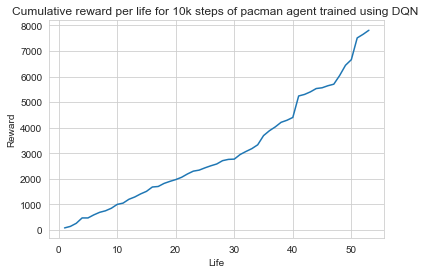

In [56]:
# plot life/episode rewards
col_list = ["total_life", "total_reward"]
# df = pd.read_csv("df_mod_visualization.csv", usecols=col_list)
# data_2021-02-02_10-55-52/df_mod.csv
df = pd.read_csv("dqn_pacman_100k/df_mod.csv", usecols=col_list, nrows = 10000)
# omit blank rows
df=df.dropna()
plt.plot("total_life", "total_reward", data = df)
plt.xlabel('Life')
plt.ylabel('Reward')
plt.title("Cumulative reward per life for 10k steps of pacman agent trained using DQN ")
plt.show()

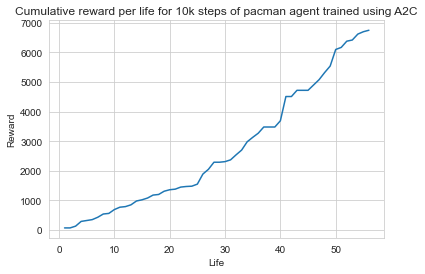

In [61]:
# Plot life/episode rewards for A2C (first environment)

col_list = ["total_life_env_0", "total_reward_env_0"]
df = pd.read_csv("vis_3.csv", usecols=col_list, nrows = 10000)
# omit blank rows
df=df.dropna()
plt.plot("total_life_env_0", "total_reward_env_0", data = df)
plt.xlabel('Life')
plt.ylabel('Reward')
plt.title("Cumulative reward per life for 10k steps of pacman agent trained using A2C")
plt.show()

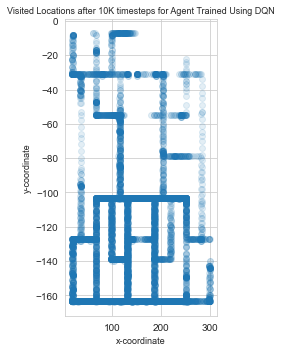

In [63]:
# Plot pacman coordinates 
sns.set_style("whitegrid")

#Variable for figure size (w,h)
fgsz = (3, 5)

col_list = ["pacman_coord_x", "pacman_coord_y"]
df = pd.read_csv("dqn_pacman_100k/df_mod.csv", usecols=col_list, nrows = 10000)
df["pacman_coord_y"] *= -1

plt.figure(figsize=fgsz)
plt.scatter("pacman_coord_x", "pacman_coord_y", alpha=0.12, data=df, cmap=plt.cm.Spectral,  label ="agent taking 10K timesteps")
plt.xlabel('x-coordinate', fontsize=9)
plt.ylabel('y-coordinate', fontsize=9)
plt.title('Visited Locations after 10K timesteps for Agent Trained Using DQN', fontsize=9)
plt.tight_layout()
plt.show()

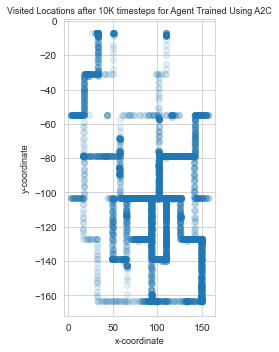

In [66]:
# Plot pacman coordinates 
sns.set_style("whitegrid")

#Variable for figure size (w,h)
fgsz = (3, 5)

col_list = ["pacman_coord_x_env_0", "pacman_coord_y_env_0"]
df = pd.read_csv("vis_3.csv", usecols=col_list, nrows = 10000)
df["pacman_coord_y_env_0"] *= -1

plt.figure(figsize=fgsz)
plt.scatter("pacman_coord_x_env_0", "pacman_coord_y_env_0", alpha=0.12, data=df, cmap=plt.cm.Spectral,  label ="agent taking 10K timesteps")
plt.xlabel('x-coordinate', fontsize=9)
plt.ylabel('y-coordinate', fontsize=9)
plt.title('Visited Locations after 10K timesteps for Agent Trained Using A2C', fontsize=9)
plt.tight_layout()
plt.show()

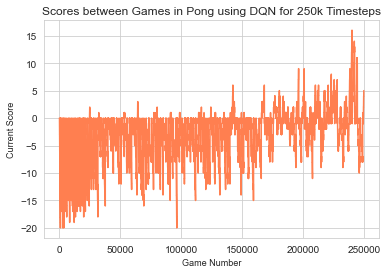

In [70]:
# Plot pong scores using DQN

#Variable for figure size (w,h)
fgsz = (3, 5)

# read from csv
col_list = ["state", "curr_score", "paddle_ball_distance"]
df = pd.read_csv("pong_100k_legit.csv", usecols=col_list)

plt.plot(df['state'],df['curr_score'],c="coral")
plt.xlabel('Game Number', fontsize=9)
plt.ylabel('Current Score', fontsize=9)
plt.title('Scores between Games in Pong using DQN for 250k Timesteps')

plt.show()


<Figure size 216x360 with 0 Axes>

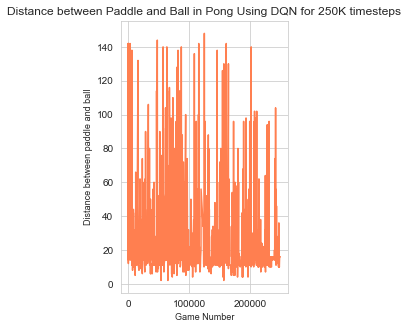

In [73]:
# plot distance between paddle and ball
#Variable for figure size (w,h)
fgsz = (3, 5)

# read from csv
col_list = ["state", "curr_score", "paddle_ball_distance", "ball_coord_x"]
df = pd.read_csv("pong_100k_legit.csv", usecols=col_list)

plt.figure(figsize=fgsz)
# 282 is fixed x-coordinate of paddle
df = df[df['ball_coord_x'] == 282]

plt.figure(figsize=fgsz)
plt.plot(df['state'],df['paddle_ball_distance'],c="coral")
plt.xlabel('Game Number', fontsize=9)
plt.ylabel('Distance between paddle and ball', fontsize=9)
plt.title('Distance between Paddle and Ball in Pong Using DQN for 250K timesteps')
plt.show()